## Import the necesary packages 

In [1]:
import pandas as pd 
import cv2                 
import numpy as np         
import os,sys                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split 

## Giving the path location for our two directories which are train and test folders

In [5]:
TRAIN_DIR = r"C:\Users\lenovo\cancer\train"
TEST_DIR = r'C:\Users\lenovo\cancer\test'


In [6]:
##assigning a variable label=0 to directory NORMAL and label=1  to directory CANCER and label=2 to none of the directory 
##therefore now we will have three labels and we will use softmax activation function in our last layer of the neural network
##as we have three labels
def get_label(nextdir):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['CANCER']:
                label = 1
            else:
                label = 2
            return nextdir, label

In [7]:
##this helper fucntion is useful as the following below code will call our function preprocessing_data and then subsequently 
##TRAIN_DIR and TEST_DIR will go inside the function preprocessing_data and then two folders will be extracted which will be 
##cancer and normal folder
def preprocessing_data(Dir):
    X = []
    y = []
    print(Dir)
    
    folders=os.listdir(Dir)
    for nextdir in folders:
        nextdir, label = get_label(nextdir)
        temp = os.path.join(Dir,nextdir)
        print(temp)
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

## Extracting training and testing data from our respective directories

In [25]:
X_train, y_train = preprocessing_data(TRAIN_DIR)

C:\Users\lenovo\cancer\train
C:\Users\lenovo\cancer\train\Cancer


100%|██████████████████████████████████████████████████████████████████████████████| 2478/2478 [00:57<00:00, 42.90it/s]


C:\Users\lenovo\cancer\train\Normal


100%|██████████████████████████████████████████████████████████████████████████████| 2483/2483 [00:58<00:00, 41.33it/s]


In [26]:
X_test, y_test = preprocessing_data(TEST_DIR)

C:\Users\lenovo\cancer\test
C:\Users\lenovo\cancer\test\Cancer


100%|████████████████████████████████████████████████████████████████████████████████| 629/629 [00:15<00:00, 43.62it/s]


C:\Users\lenovo\cancer\test\Normal


100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [00:14<00:00, 42.90it/s]


## Printing the shapes of X_train,X_test ,y_train and y_test

In [27]:
print(X_train.shape,'\n',X_test.shape)

(4961, 150, 150, 3) 
 (1249, 150, 150, 3)


In [28]:
print(y_train.shape,'\n',y_test.shape)

(4961,) 
 (1249,)


## We want  a row vector numpy array  for y_train and y_test

In [29]:
y_train=np.array(y_train)
y_train=np.reshape(y_train,(4961,1))
print(y_train.shape)

y_test=np.array(y_test)
y_test=np.reshape(y_test,(1249,1))
print(y_test.shape)

(4961, 1)
(1249, 1)


## Printing out the names of the images which are both cancerous and non-cancerous

In [18]:

p_path=os.path.join(TRAIN_DIR,'CANCER')
p_images_names = os.listdir(p_path)
print(p_images_names[:10])

n_path=os.path.join(TRAIN_DIR,'NORMAL')
n_images_names = os.listdir(n_path)
print(n_images_names[:10])      
 

['_0_1173.jpeg', '_0_1276.jpeg', '_0_1285.jpeg', '_0_1400.jpeg', '_0_1483.jpeg', '_0_1511.jpeg', '_0_1579.jpeg', '_0_1582.jpeg', '_0_1683.jpeg', '_0_1737.jpeg']
['_0_1063.jpeg', '_0_1106.jpeg', '_0_1349.jpeg', '_0_1437.jpeg', '_0_1529.jpeg', '_0_1587.jpeg', '_0_1726.jpeg', '_0_204.jpeg', '_0_2045.jpeg', '_0_2065.jpeg']


## Plotting the images

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


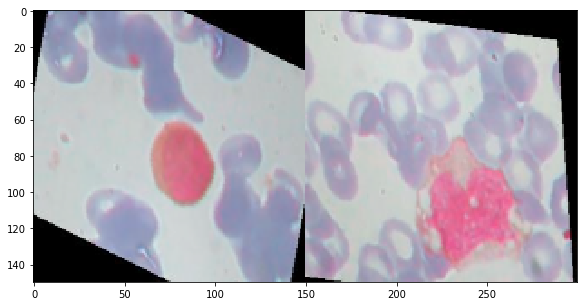

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


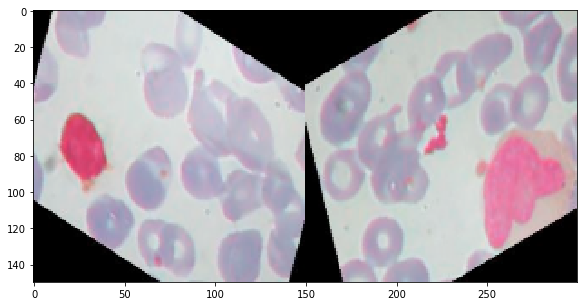

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


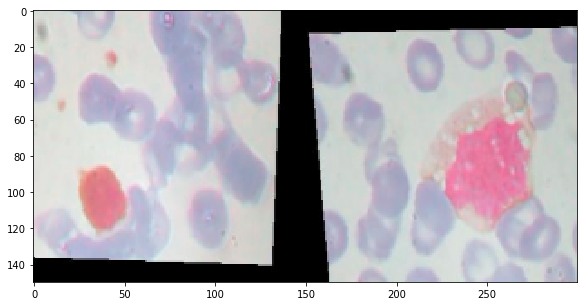

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


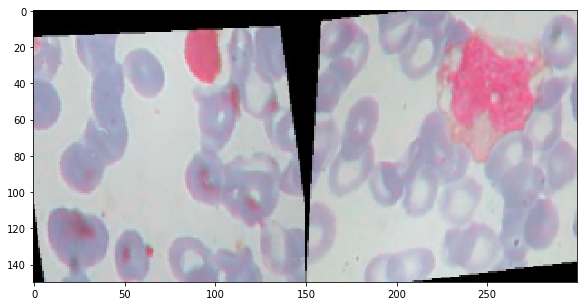

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


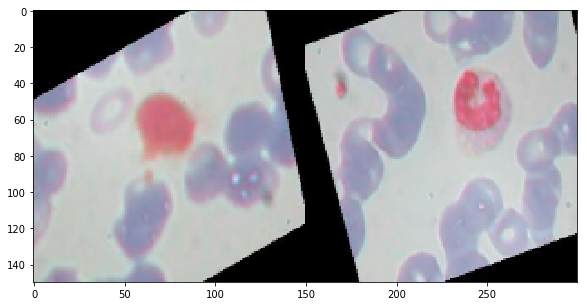

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


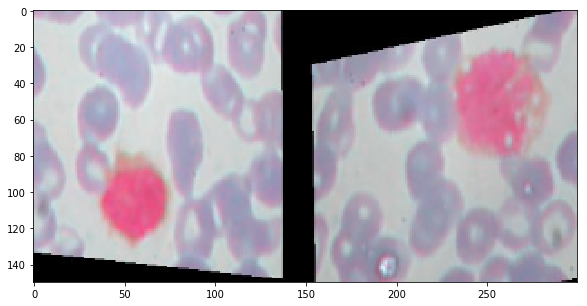

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


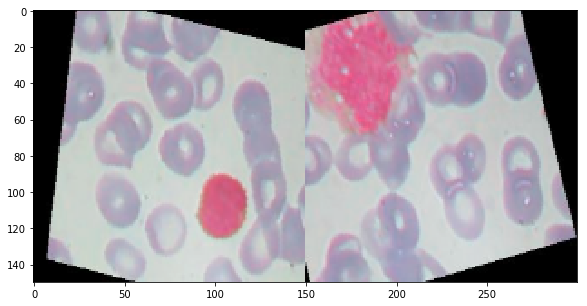

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


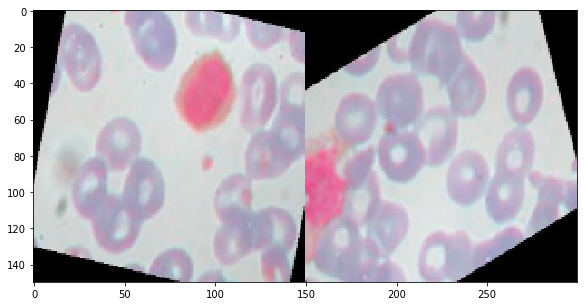

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


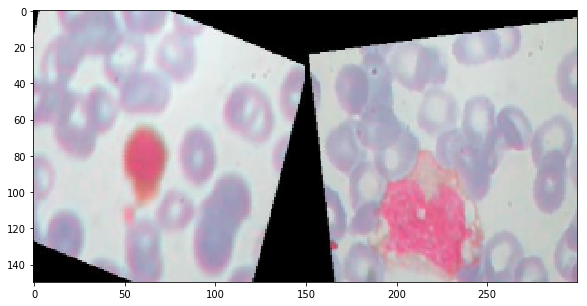

(Left) - No CANCER Vs (Right) - CANCER
-----------------------------------------------------------------------------------------------------------------------------------


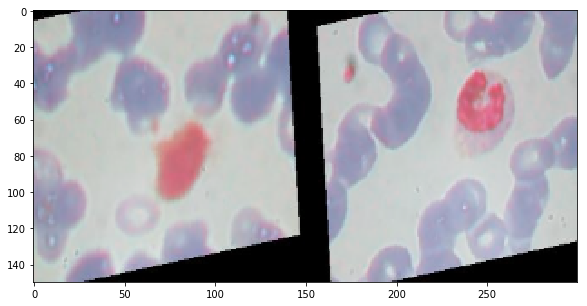

In [21]:
import matplotlib.pyplot as plt
for i in range(10):
    k=os.path.join(p_path,p_images_names[i])
    imagep1 = cv2.imread(k)
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    
    kk=os.path.join(n_path,n_images_names[i])
    imagen1 = cv2.imread(kk)
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No CANCER Vs (Right) - CANCER")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()


## Importing the necessary packages for our CNN model

In [30]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

## CNN sequential model 

In [31]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(150,150,3)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3 , activation='softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())

W1109 17:40:31.965225  1632 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 17:40:31.992155  1632 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 17:40:32.132777  1632 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1109 17:40:32.302360  1632 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1109 17:40:32.342219  1632 deprecation_wrapper.py:119] From C:\Users\lenov

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 64)      18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 64)       

## One hot encoding the y_train and y_test

In [32]:
import numpy as np
from keras.utils import to_categorical
def encode(data):
    print('Shape of data (BEFORE encode): %s' % str(data.shape))
    encoded = to_categorical(data,num_classes=3)
    print('Shape of data (AFTER  encode): %s\n' % str(encoded.shape))
    return encoded

In [33]:
y_train= encode(y_train)
y_test=encode(y_test)

print(y_train)
print(y_test)

Shape of data (BEFORE encode): (4961, 1)
Shape of data (AFTER  encode): (4961, 3)

Shape of data (BEFORE encode): (1249, 1)
Shape of data (AFTER  encode): (1249, 3)

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


## Keras provides a checkpoint capability by a callback API
## Keras also provides a Reduce Learning Rate when a metric has stopped improving

In [35]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

filepath=r"E:\Tensorflow\my_model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [37]:
epochs=10
batch_size=256

history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce, checkpoint], epochs=epochs,batch_size)

## Save the model

In [ ]:
path=r'C:\Users\lenovo\cancer\my_model.h5'
model.save(path)